Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 1
## april 2021. 

# Pavle Šarenac 2020/0359

# __Zadatak__: Sistemi sa pojavom histerezisa
Jedna od diferencijalnih jednačina koja ima veliku primenu u opisivanju određenih dinamičkih sistema u okviru ekonomije i biologije, ima formu:

\begin{equation}
    \frac{dx}{dt} = -x^3 + x + k
\end{equation}

a) Formirati Python definiciju <font color='blue'>zero_finder</font> koja pronalazi sva stacionarna rešenja jednačine u zavisnosti od parametra $k$. Pozivni parametri definicije treba da budu $k$, $x_{min}$ i $x_{max}$, odnosno vrednost parametra $k$ i opseg u kome se traže stacionarna rešenja (donja i gornja granica opsega). Definicija treba da vrati sve vrednosti promenljive $x$ koje predstavljaju stacionarna rešenja u zadatom opsegu za zadatu vrednost parametra $k$. 

Primeniti definiciju na tri slučaja: $k = -3, 0, 3$. Na istom grafiku, linijama različitih boja prikazati fazne dijagrame $dx/dt$ u funkciji od $x$ za opseg od $x_{min}$ do $x_{max}$ za tri zadate vrednosti parametra $k$. Obeležiti ose grafika, grafik nasloviti "fazni dijagram" i prikazati legendu oznaka. Isprekidanom horizontalnom linijom proizvoljne boje označiti osu $dx/dt = 0$. 

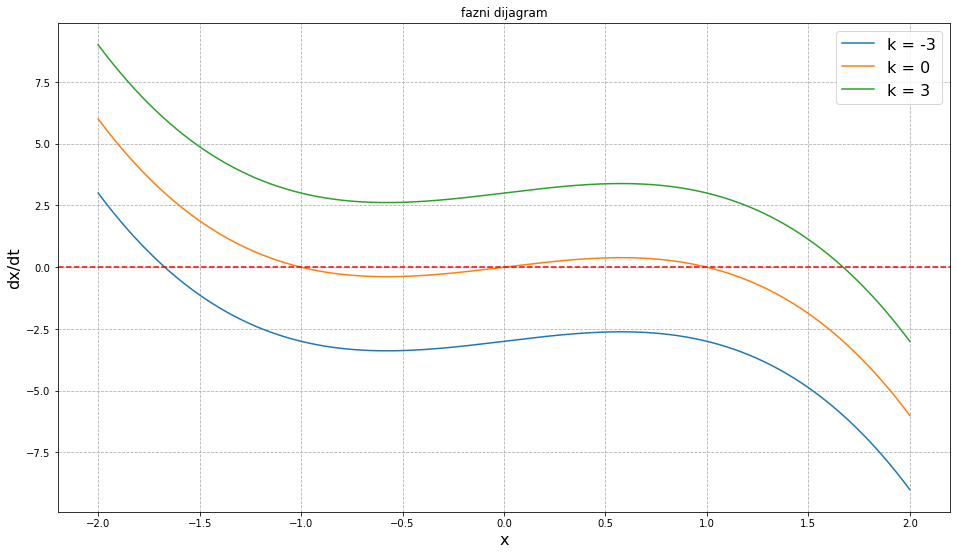

Stacionarna resenja za k = -3 su: [-1.6718359179589795]
Stacionarna resenja za k = 0 su: [-1.0015007503751878, -0.0010005002501252136, 0.9994997498749374]
Stacionarna resenja za k = 3 su: [1.6698349174587293]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

equation = lambda x, k: -(x**3) + x + k
def zero_finder(k, xmin, xmax):
    functionRange = np.linspace(xmin, xmax, 2000)
    # functionRange je opseg u kom zelim da trazim nule funkcije equation
    # opseg sam izdelio na 2000 ekvidistantnih tacaka da se ne bi dogodilo da propustim neku nulu funkcije
    # to je pogotovo moguce da se dogodi ako funkcija ima neke brze promene
    
    functionSign = np.sign(equation(functionRange, k))
    # functionSign je array u koji smestam znake funkcije equation u svakoj od tacaka u opsegu functionRange(xmin, xmax, 2000)
    # dakle array functionSign ce imati isto elemenata koliko i array functionRange
    # np.sign() vraca array od elemenata koji se formiraju po sledecem pravilu:
    # vraca 1 za pozitivan argument, 0 za nulu, -1 za negativan argument
    
    functionDiff = np.diff(functionSign)
    # np.diff() pronalazi razliku izmedju svaka dva susedna elementa
    # np.diff() daje novi niz [functionSign[1] - functionSign[0], functionSign[2] - functionSign[1], ...]
    # ovaj novi niz ce imati jedan clan manje u odnosu na pocetni jer prvi element nema prethodnika
    # np.diff() vraca nulu sve dok je sledeci znak isti kao prosli -> npr 1-1=0, -1-(-1)=0
    # kada np.diff() vrati nesto sto nije nula znamo da se znak promenio -> npr. 1-(-1)=2, 1-0=1, -1-(1)=-2
    
    functionZeros = np.where(functionDiff != 0)
    # np.where() vraca array sa indeksima elemenata niza "functionDiff" koji su razliciti od nule
    # to su ujedno i indeksi elemenata niza functionRange koji su u okolini tacke za koju funkcija prolazi kroz nulu
    return [functionRange[index] for index in functionZeros[0]]

k = [-3, 0, 3]
xmin, xmax = -2, 2
functionRange = np.linspace(xmin, xmax, 2000)

plt.figure(figsize=(16, 9))
plt.title("fazni dijagram")
plt.grid(linestyle="--")
plt.plot(functionRange, equation(functionRange, k[0]), label="k = -3")
plt.plot(functionRange, equation(functionRange, k[1]), label="k = 0")
plt.plot(functionRange, equation(functionRange, k[2]), label="k = 3")
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("x", size=16)
plt.ylabel("dx/dt", size=16)
plt.legend(prop={'size': 16})
plt.show()

for i in range(len(k)):
    print("Stacionarna resenja za k = {} su: {}".format(k[i], zero_finder(k[i], xmin, xmax)))

Komentarisati kako parametar $k$ utiče na broj stacionarnih stanja.

Kada je k = 0, onda imamo kubnu funkciju koja ima tri rešenja funkcije dx/dt, što su zapravo naša stacionarna stanja. Međutim, ako postoji slobodan član k koji je različit od nule, onda se događa translacija funkcije po y-osi. Što je veća apsolutna vrednost parametra k, to će se funkcija više translirati po y-osi(na gore, ako je k > 0, ili na dole za k < 0) i zbog toga za k = -3 i k = 3 imamo samo jedno stacionarno rešenje.

b) Napraviti Python definiciju <font color='blue'>histerezis</font> koja predstavlja napisanu diferencijalnu jednačinu, a zatim za $k = 0$ odrediti rešenje diferencijalne jednačine $x(t)$ u vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka. Diferencijalnu jednačinu treba rešiti dva puta, jednom za početni uslov $x(0) = -0.00001$, drugi put za početni uslov $x(0) = 0.00001$. Rešenja prikazati na subplot $1\times 2$ grafiku. Obeležiti ose grafika i nasloviti oba grafika. U naslovima treba da stoji vrednost početnog uslova za koji je grafik dobijen.

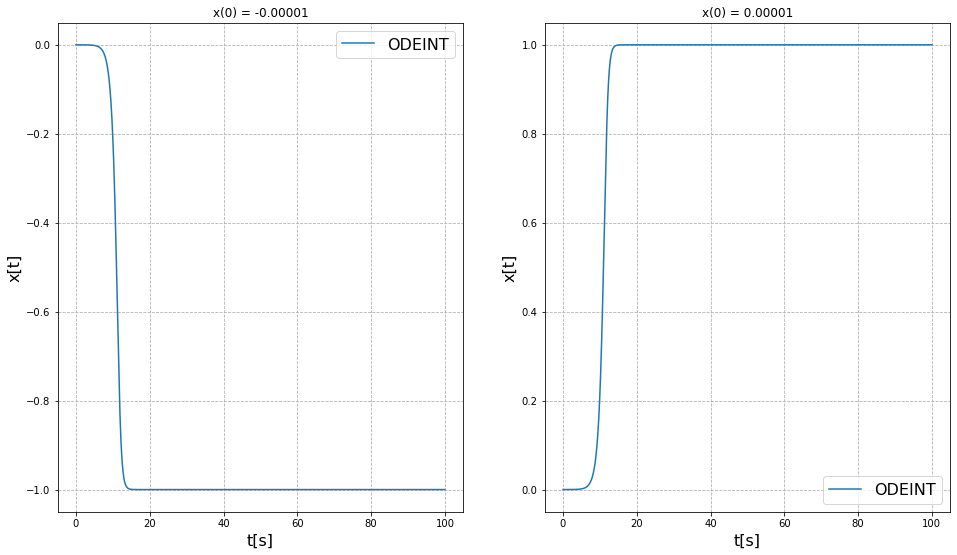

In [14]:
def histerezis(x, t, k):
    return -(x**3) + x + k

k = 0
t = np.linspace(0, 100, 2000)
initialCondition = [-0.00001, 0.00001]

sol1 = integrate.odeint(histerezis, initialCondition[0], t, args=(k, ))
sol2 = integrate.odeint(histerezis, initialCondition[1], t, args=(k, ))
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.plot(t, sol1, label="ODEINT")
plt.title("x(0) = -0.00001")
plt.xlabel("t[s]", size=16)
plt.ylabel("x[t]", size=16)
plt.grid(linestyle="--")
plt.legend(prop = {"size" : 16})

plt.subplot(1, 2, 2)
plt.plot(t, sol2, label="ODEINT")
plt.title("x(0) = 0.00001")
plt.xlabel("t[s]", size=16)
plt.ylabel("x[t]", size=16)
plt.grid(linestyle="--")
plt.legend(prop = {"size" : 16})

plt.show()

Da li rešenja ulaze u stacionarno stanje? Koliko iznosi stacionarno stanje u jednom, a koliko u drugom slučaju? Da li iz dobijenih rezultata sledi da je stacionarna tačka $x = 0$ privlačnog ili odbojnog karaktera?

Oba rešenja ulaze u stacionarno stanje. U prvom slučaju ono iznosi -1, dok je u drugom 1. Iz dobijenih rezultata sledi da je stacionarna tačka x = 0 odbojnog karaktera jer sistem ne ulazi u stabilno stanje ravnoteže u ovoj tački.

c) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafik iz tačke b) primenom ove metode.

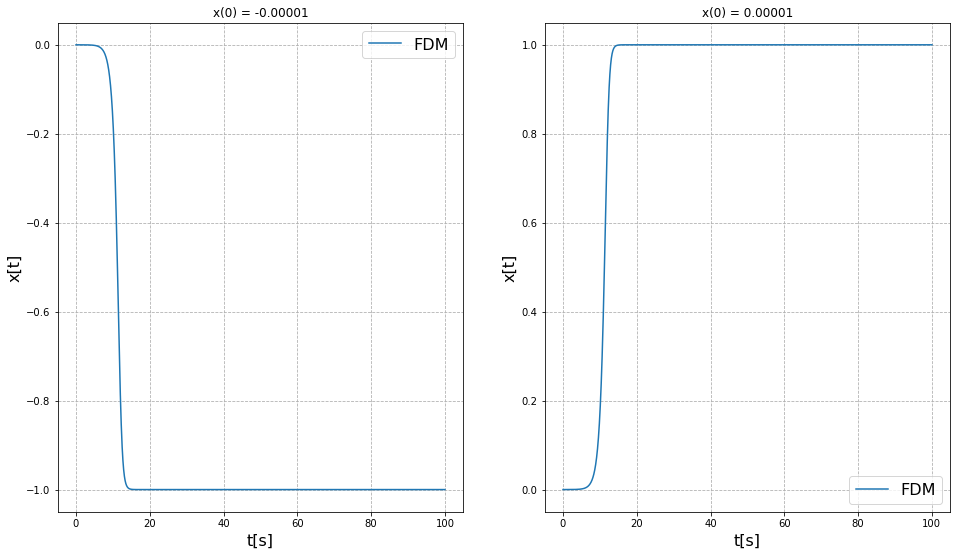

In [15]:
k = 0
t = np.linspace(0, 100, 2000)
initialCondition = [-0.00001, 0.00001]

# pravim 2 matrice sa len(t) = 2000 vrsta i jednom kolonom
solFdm1 = np.zeros([len(t), 1])
solFdm2 = np.zeros([len(t), 1])
# prvu vrstu matrica popunjavam pocetnim uslovom - prvu sa initialCondition[0], drugu sa initialCondition[1]
solFdm1[0] = initialCondition[0]
solFdm2[0] = initialCondition[1]

# metod konacnih razlika
# radim rucno priblizno ono sto metoda integrate.odeint radi automatski
# x(t = t[1]) = x(t = t[0]) + dx/dt(t = t[0]) * (t[1] - t[0])
for i in range(1, len(t)):
    solFdm1[i] = solFdm1[i - 1] + np.array(histerezis(solFdm1[i - 1], t[i], k)) * (t[i] - t[i - 1])
    solFdm2[i] = solFdm2[i - 1] + np.array(histerezis(solFdm2[i - 1], t[i], k)) * (t[i] - t[i - 1])
    
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.plot(t, solFdm1, label="FDM")
plt.grid(linestyle="--")
plt.title("x(0) = -0.00001")
plt.xlabel("t[s]", size=16)
plt.ylabel("x[t]", size=16)
plt.legend(prop = {"size" : 16})

plt.subplot(1, 2, 2)
plt.plot(t, solFdm2, label="FDM")
plt.title("x(0) = 0.00001")
plt.xlabel("t[s]", size=16)
plt.ylabel("x[t]", size=16)
plt.grid(linestyle="--")
plt.legend(prop = {"size" : 16})

plt.show()

d) Korišćenjem definicije <font color='blue'>histerezis</font> rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka, ali za različite vrednosti parametra $k$. Parametar $k$ varirati u rasponu od $-3$ do $3$ u 200 ekvidistantnih tačaka i za svaku vrednost rešiti diferencijalnu jednačinu za dva početna uslova, prvi put za $x(0) = -4$, drugi put za početni uslov $x(0) = 4$. U vektor <font color='blue'>x1</font> u svakoj iteraciji (za svaku vrednost parametra $k$) smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za prvi početni uslov, a u vektor <font color='blue'>x2</font> smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za drugi početni uslov. Za stacionarnu vrednost usvajati vrednost za $x$ u dovoljno dalekom vremenskom trenutku za koji se pretpostavlja da nastupilo stacionarno stanje. Na istom grafiku, različitim bojama nacrtati zavisnosti <font color='blue'>x1(k)</font> (punom linijom) i <font color='blue'>x2(k)</font> (isprekidanom linijom). Obeležiti ose grafika i prikazati legendu oznaka. 

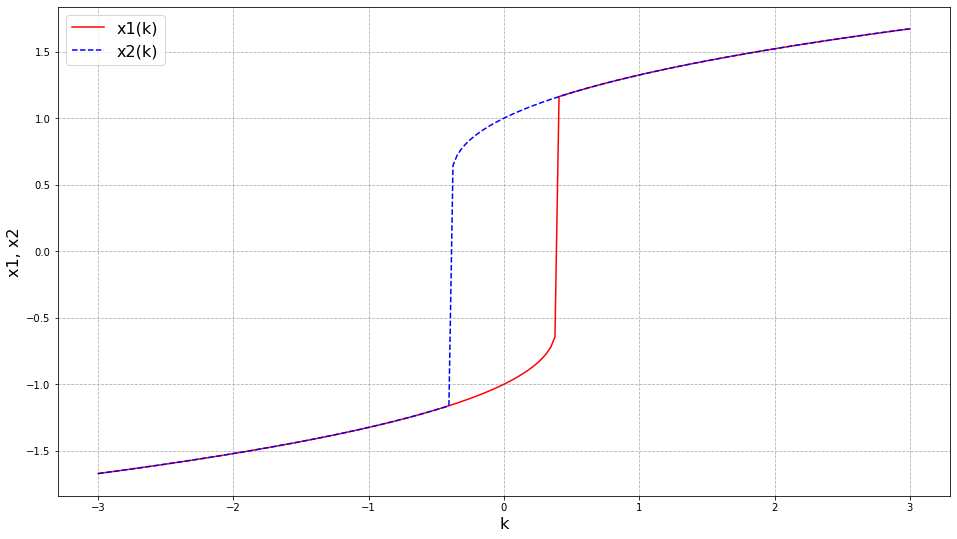

In [16]:
t = np.linspace(0, 100, 2000)
k = np.linspace(-3, 3, 200)
initialCondition = [-4, 4]
x1 = np.zeros(200)
x2 = np.zeros(200)

for i in range(len(k)):
    sol1 = integrate.odeint(histerezis, initialCondition[0], t, args=(k[i], ))
    x1[i] = sol1[len(t) - 1]  # uzimam sol1[len(t) - 1] da budem siguran da sam izabrao stacionarnu vrednost
    
    sol2 = integrate.odeint(histerezis, initialCondition[1], t, args=(k[i], )) 
    x2[i] = sol2[len(t) - 1]  # uzimam sol2[len(t) - 1] da budem siguran da sam izabrao stacionarnu vrednost

plt.figure(figsize=(16, 9))
plt.plot(k, x1, color="red", label="x1(k)")
plt.plot(k, x2, color="blue", linestyle="--", label="x2(k)")
plt.xlabel("k", size=16)
plt.ylabel("x1, x2", size=16)
plt.grid(linestyle="--")
plt.legend(prop = {"size" : 16})
plt.show()

Pomoću faznih dijagrama nacrtanih u tački a) detaljno objasniti dobijenu formu grafika. Objasniti kojom putanjom se dobijeni grafik opisuje u smeru porasta parametra $k$, a kojom putanjom u smeru smanjivanja parametra $k$.

Za manje vrednosti slobodnog člana k, biće i manje stacionarne vrednosti rešenja diferencijalne jednačine. Isto tako, za veće vrednosti slobodnog člana k, biće veće stacionarne vrednosti rešenja diferencijalne jednačine. Vidimo da za svako k čija je apsolutna vrednost veća od apsolutne vrednosti broja koja je između 0 i 1 (kada je |k| manje ili jednako tom broju onda imamo više stacionarnih tačaka) imamo samo jednu stacionarnu vrednost rešenja diferencijalne jednačine. Ova pojava se može zapaziti i kod faznih dijagrama u tački a) - za k = -3 i k = 3 imamo po jednu stacionarnu tačku, dok za k = 0 imamo čak tri stacionarne tačke. <br>

U smeru porasta parametra k, grafik se opisuje putanjom funkcije x1(k), dok se u smeru smanjivanja parametra k grafik opisuje putanjom funkcije x2(k).